# Lunar Chronology Crater Analysis

## Required Dataset

This code requires [Moon Crater Database v1 Robbins](https://astrogeology.usgs.gov/search/map/Moon/Research/Craters/lunar_crater_database_robbins_2018).

Download the csv [here](https://pdsimage2.wr.usgs.gov/Individual_Investigations/moon_lro.kaguya_multi_craterdatabase_robbins_2018/data/lunar_crater_database_robbins_2018.csv).

## Required packages [(source)](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#building-identical-conda-environments)

To create this spec list as a file in the current working directory, run:

``` PYTHON
conda list --explicit > geo_env_file.txt
```

To use the spec file to create an identical environment on the same machine or another machine:

``` PYTHON
conda create --name geo_env --file geo_env_file.txt
```

To use the spec file to install its listed packages into an existing environment:

``` PYTHON
conda install --name geo_env --file geo_env_file.txt
```


In [19]:
# import packages
import scipy
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pygmt
import math
from matplotlib.patches import Rectangle

pi = np.pi # defines pi as a variable for later use

robbins = pd.read_csv("lunar_crater_database_robbins_2018.csv") # imports the entirety of the robbins database
coords_LL = robbins[['LON_CIRC_IMG','LAT_CIRC_IMG','DIAM_CIRC_IMG']] # saves the latitude, longitude, and diameter from the database as a dataframe
coords_LL = coords_LL.loc[(coords_LL['DIAM_CIRC_IMG'] < 5)] # removes craters larger than 5 km

# data checking


In [20]:
# translate lat/lon into cylindrical equal area projection
def translate_lon(longitude_i): # defines function that converts longitude into x coordinate in projection
    return np.pi * longitude_i / 180
def translate_lat(latitude_i): # defines function that converts latitude into y coordinate in projection
    return np.sin(np.deg2rad(latitude_i))

coords_C=pd.DataFrame() # creates an empty dataframe
coords_C.loc[:, 'LON_CIRC_IMG'] = coords_LL.loc[:, 'LON_CIRC_IMG'].apply(translate_lon) # applies transformation to longitude and adds to new dataframe
coords_C.loc[:, 'LAT_CIRC_IMG'] = coords_LL.loc[:, 'LAT_CIRC_IMG'].apply(translate_lat) # applies transformation to latitude and adds to new dataframe
coords_C.loc[:, 'DIAM_CIRC_IMG'] = coords_LL.loc[:, 'DIAM_CIRC_IMG'] # adds diameter information to the new dataframe

# define variables
coords_C_num = coords_C.to_numpy() # converts pandas dataframe to numpy array
x = coords_C_num[:,0] # creates x variable from array data
y = coords_C_num[:,1] # creates y variable from array data
diams = coords_C_num[:,2] # creates diam variable from array data

In [21]:
# statistical analysis using gaussian kde to evaluate density of craters
nbins=100 # number of bins data will be sorted in
k = scipy.stats.gaussian_kde([x,y]) # performs guassian kde

# uses guassian kde to create a heatmap
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
%store xi yi zi

Stored 'xi' (ndarray)
Stored 'yi' (ndarray)
Stored 'zi' (ndarray)


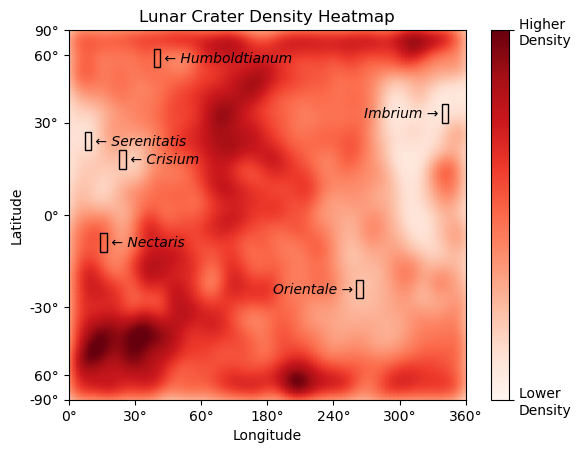

In [22]:
# plotting heatmap
ax = plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.Reds, vmin=0, vmax=.15) # plots heatmap, uses gouraud smooth shading, sets color min as 0 and max as .15
cbar = plt.colorbar(ticks=[0, 0.15]) # creates colorbar using defined min and max

# labelling
cbar.ax.set_yticklabels(['Lower \nDensity', 'Higher \nDensity'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Lunar Crater Density Heatmap')

# convert x/y axis back into readable longitude adn latitude
plt.xticks([0,pi/3,2*pi/3,pi,4*pi/3,5*pi/3,2*pi], ['0°','30°','60°','180°','240°','300°','360°'])
plt.yticks([-1,-0.866,-.5,0,.5,0.866,1], ['-90°','60°','-30°','0°','30°','60°','90°',])


# plotting rectangles to represent basins and labelling them
#serenitatis
plt.gca().add_patch(Rectangle((0.25,0.35),0.1,0.1, edgecolor='black', facecolor='none', lw=1))
plt.text(0.25+0.1, 0.35+0.025, " \u2190 Serenitatis", style='italic')

#nectaris
plt.gca().add_patch(Rectangle((0.5,-0.2),0.1,0.1, edgecolor='black', facecolor='none', lw=1))
plt.text(0.5+0.1, -0.2+0.025, " \u2190 Nectaris", style='italic')

#crisium
plt.gca().add_patch(Rectangle((0.8,0.25),0.1,0.1, edgecolor='black', facecolor='none', lw=1))
plt.text(0.8+0.1, 0.25+0.025, " \u2190 Crisium", style='italic')

#humboldtianum
plt.gca().add_patch(Rectangle((1.35,0.8),0.1,0.1, edgecolor='black', facecolor='none', lw=1))
plt.text(1.35+0.1, 0.8+0.025, " \u2190 Humboldtianum", style='italic')

#imbrium
plt.gca().add_patch(Rectangle((5.9,.5),0.1,0.1, edgecolor='black', facecolor='none', lw=1))
plt.text(5.9-0.05, .5+0.025, "Imbrium \u2192", style='italic', ha='right')

#orientale
plt.gca().add_patch(Rectangle((4.55,-.450),0.1,0.1, edgecolor='black', facecolor='none', lw=1))
plt.text(4.55-0.05, -.450+0.025, "Orientale \u2192", style='italic', ha='right')

plt.show() # generates plot

number of craters:  116


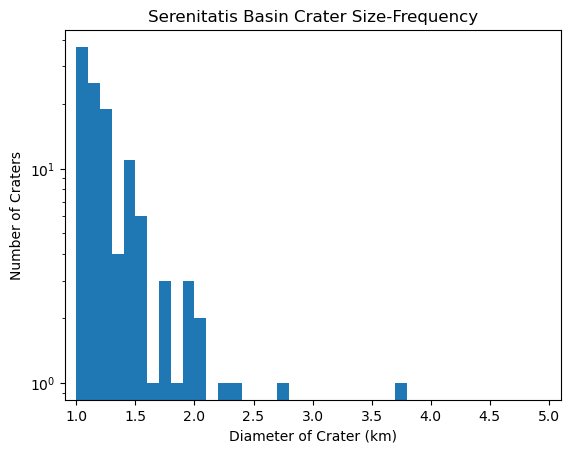

In [23]:
#serenitatis

# defines min/max x/y as defined in coordinate_selection.py
x_min_seren = 0.25
y_min_seren = 0.35
x_max_seren = 0.35
y_max_seren = 0.45

# sorts database to include only craters within the defined range
data_seren = coords_C.loc[(coords_C['LON_CIRC_IMG'] > x_min_seren) & (coords_C['LON_CIRC_IMG'] < x_max_seren) & (coords_C['LAT_CIRC_IMG'] > y_min_seren) & (coords_C['LAT_CIRC_IMG'] < y_max_seren)]
diams_seren = data_seren[['DIAM_CIRC_IMG']] # selects diams column
print('number of craters: ', diams_seren.size) # prints number of craters within area

fig, ax = plt.subplots()
ax.hist(diams_seren, bins=np.arange(0, 5, 5/50)) # creates histogram with defined bins to allow for comparisons across graphs
plt.yscale('log') # log y scale

#labelling
plt.xlabel('Diameter of Crater (km)')
plt.ylabel('Number of Craters')
plt.title('Serenitatis Basin Crater Size-Frequency')

plt.xlim(.9,5.1) # buffer space on x axis

plt.show() # produces plot

number of craters:  1330


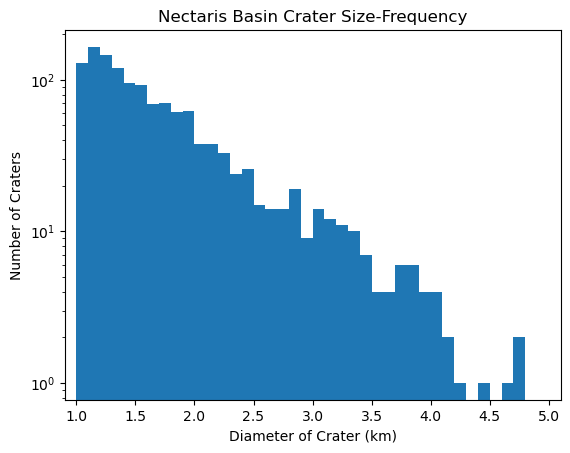

In [24]:
#nectaris

# defines min/max x/y as defined in coordinate_selection.py
x_min_nect = 0.5
y_min_nect = -0.2
x_max_nect = 0.6
y_max_nect = -0.1

# sorts database to include only craters within the defined range
data_nect = coords_C.loc[(coords_C['LON_CIRC_IMG'] > x_min_nect) & (coords_C['LON_CIRC_IMG'] < x_max_nect) & (coords_C['LAT_CIRC_IMG'] > y_min_nect) & (coords_C['LAT_CIRC_IMG'] < y_max_nect)]
diams_nect = data_nect[['DIAM_CIRC_IMG']]  # selects diams column
print('number of craters: ', diams_nect.size) # prints number of craters within area

fig, ax = plt.subplots()
ax.hist(diams_nect, bins=np.arange(0, 5, 5/50))  # creates histogram with defined bins to allow for comparisons across graphs
plt.yscale('log') # log y scale

#labelling
plt.xlabel('Diameter of Crater (km)')
plt.ylabel('Number of Craters')
plt.title('Nectaris Basin Crater Size-Frequency')

plt.xlim(.9,5.1) # buffer space on x axis

plt.show() # produces plot

number of craters:  434


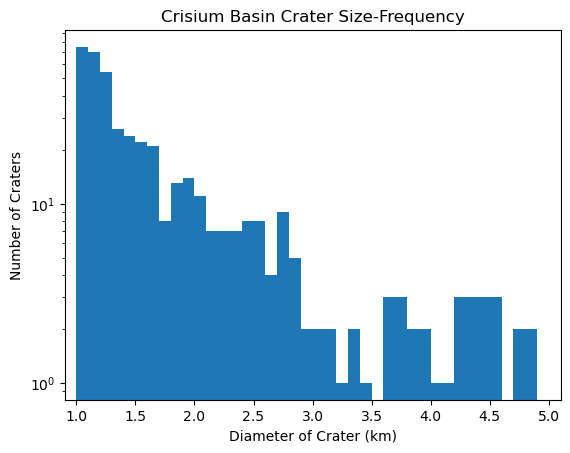

In [25]:
#crisium

# defines min/max x/y as defined in coordinate_selection.py
x_min_cris = 0.8
y_min_cris = 0.25
x_max_cris = 0.9
y_max_cris = 0.35

# sorts database to include only craters within the defined range
data_cris = coords_C.loc[(coords_C['LON_CIRC_IMG'] > x_min_cris) & (coords_C['LON_CIRC_IMG'] < x_max_cris) & (coords_C['LAT_CIRC_IMG'] > y_min_cris) & (coords_C['LAT_CIRC_IMG'] < y_max_cris)]
diams_cris = data_cris[['DIAM_CIRC_IMG']] # selects diams column
print('number of craters: ', diams_cris.size) # prints number of craters within area

fig, ax = plt.subplots()
ax.hist(diams_cris, bins=np.arange(0, 5, 5/50)) # creates histogram with defined bins to allow for comparisons across graphs
plt.yscale('log') # log y scale

#labelling
plt.xlabel('Diameter of Crater (km)')
plt.ylabel('Number of Craters')
plt.title('Crisium Basin Crater Size-Frequency')

plt.xlim(.9,5.1) # buffer space on x axis

plt.show() # produces plot

number of craters:  647


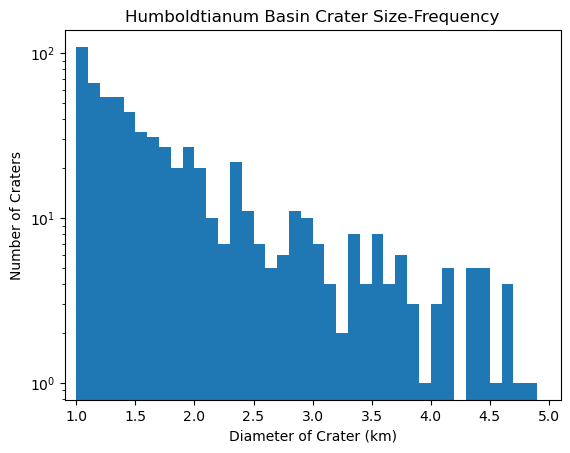

In [26]:
#humboldtianum

# defines min/max x/y as defined in coordinate_selection.py
x_min_humb = 1.35
y_min_humb = 0.8
x_max_humb = 1.45
y_max_humb = 0.9

# sorts database to include only craters within the defined range
data_humb = coords_C.loc[(coords_C['LON_CIRC_IMG'] > x_min_humb) & (coords_C['LON_CIRC_IMG'] < x_max_humb) & (coords_C['LAT_CIRC_IMG'] > y_min_humb) & (coords_C['LAT_CIRC_IMG'] < y_max_humb)]
diams_humb = data_humb[['DIAM_CIRC_IMG']] # selects diams column
print('number of craters: ', diams_humb.size) # prints number of craters within area

fig, ax = plt.subplots()
ax.hist(diams_humb, bins=np.arange(0, 5, 5/50)) # creates histogram with defined bins to allow for comparisons across graphs
plt.yscale('log') # log y scale


plt.xlabel('Diameter of Crater (km)')
plt.ylabel('Number of Craters')
plt.title('Humboldtianum Basin Crater Size-Frequency')

plt.xlim(.9,5.1) # buffer space on x axis

plt.show() # produces plot

number of craters:  77


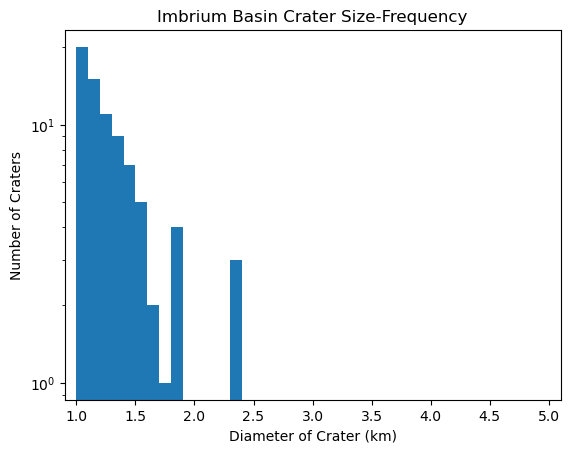

In [27]:
#imbrium

# defines min/max x/y as defined in coordinate_selection.py
x_min_imbr = 5.9
y_min_imbr = 0.5
x_max_imbr = 6.0
y_max_imbr = 0.6

# sorts database to include only craters within the defined range
data_imbr = coords_C.loc[(coords_C['LON_CIRC_IMG'] > x_min_imbr) & (coords_C['LON_CIRC_IMG'] < x_max_imbr) & (coords_C['LAT_CIRC_IMG'] > y_min_imbr) & (coords_C['LAT_CIRC_IMG'] < y_max_imbr)]
diams_imbr = data_imbr[['DIAM_CIRC_IMG']] # selects diams column
print('number of craters: ', diams_imbr.size) # prints number of craters within area

fig, ax = plt.subplots()
ax.hist(diams_imbr, bins=np.arange(0, 5, 5/50)) # creates histogram with defined bins to allow for comparisons across graphs
plt.yscale('log') # log y scale


plt.xlabel('Diameter of Crater (km)')
plt.ylabel('Number of Craters')
plt.title('Imbrium Basin Crater Size-Frequency')

plt.xlim(.9,5.1) # buffer space on x axis

plt.show() # produces plot

number of craters:  375


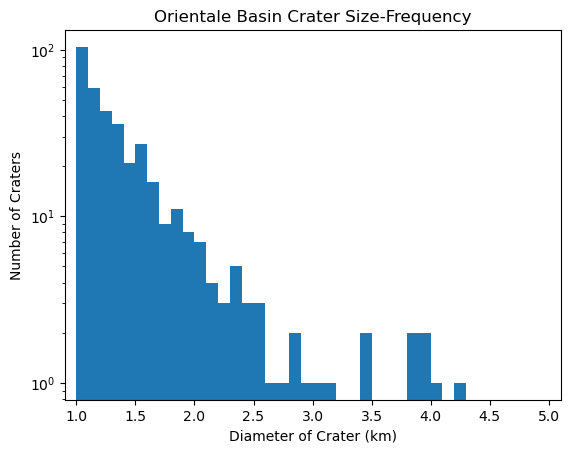

In [28]:
#orientale

# defines min/max x/y as defined in coordinate_selection.py
x_min_orien = 4.55
y_min_orien = -0.45
x_max_orien = 4.65
y_max_orien = -0.35

# sorts database to include only craters within the defined range
data_orient = coords_C.loc[(coords_C['LON_CIRC_IMG'] > x_min_orien) & (coords_C['LON_CIRC_IMG'] < x_max_orien) & (coords_C['LAT_CIRC_IMG'] > y_min_orien) & (coords_C['LAT_CIRC_IMG'] < y_max_orien)]
diams_orient = data_orient[['DIAM_CIRC_IMG']] # selects diams column
print('number of craters: ', diams_orient.size) # prints number of craters within area

fig, ax = plt.subplots()
ax.hist(diams_orient, bins=np.arange(0, 5, 5/50)) # creates histogram with defined bins to allow for comparisons across graphs
plt.yscale('log') # log y scale


plt.xlabel('Diameter of Crater (km)')
plt.ylabel('Number of Craters')
plt.title('Orientale Basin Crater Size-Frequency')

plt.xlim(.9,5.1) # buffer space on x axis

plt.show() # produces plot